Dataset is obtained from [10 food classes all data](https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip)

```
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the file 
import zipfile

zip_ref = zipfile.ZipFile('../10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

```

In [3]:
from helper_fun import *

Using tensorflow version: 2.4.1


In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Visualize some random images

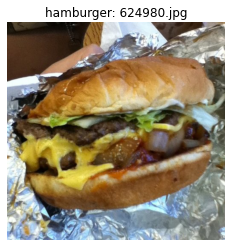

Image shape: (512, 512, 3)


In [5]:
view_random_image('10_food_classes_all_data/train/')

In [21]:
# set random seed
tf.random.set_seed(42)

# train and test dir
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

# Build data generator for the images
train_datagen = ImageDataGenerator(rescale= 1/255.)
test_datagen = ImageDataGenerator(rescale= 1/255.)

IMG_SIZE = (244, 244)

# Flow data from directory
train_data = train_datagen.flow_from_directory(directory= train_dir, 
                                               target_size= IMG_SIZE, 
                                               batch_size= 32,
                                               class_mode= 'categorical',
                                               seed = 42,
                                               shuffle = True)

test_data = test_datagen.flow_from_directory(directory= test_dir, 
                                             target_size= IMG_SIZE, 
                                             batch_size= 32,
                                             class_mode= 'categorical',
                                             seed = 42,
                                             shuffle = True)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create a baseline model

In [7]:
# Set random seed
tf.random.set_seed(42)

# Build CNN model
model_1 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (244, 244, 3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

# Compile the model
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = Adam(),
               metrics = ['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs= 5,
                        steps_per_epoch= len(train_data),
                        validation_data= test_data,
                        validation_steps= len(test_data))

Epoch 1/5
235/235 [==============================] - 78s 193ms/step - loss: 2.2538 - accuracy: 0.1585 - val_loss: 2.0773 - val_accuracy: 0.2440
Epoch 2/5
235/235 [==============================] - 45s 190ms/step - loss: 1.9895 - accuracy: 0.2936 - val_loss: 1.9911 - val_accuracy: 0.2944
Epoch 3/5
235/235 [==============================] - 44s 189ms/step - loss: 1.6477 - accuracy: 0.4410 - val_loss: 2.0747 - val_accuracy: 0.2780
Epoch 4/5
235/235 [==============================] - 44s 189ms/step - loss: 0.9691 - accuracy: 0.6975 - val_loss: 2.6739 - val_accuracy: 0.2652
Epoch 5/5
235/235 [==============================] - 45s 190ms/step - loss: 0.3508 - accuracy: 0.8985 - val_loss: 3.8021 - val_accuracy: 0.2444


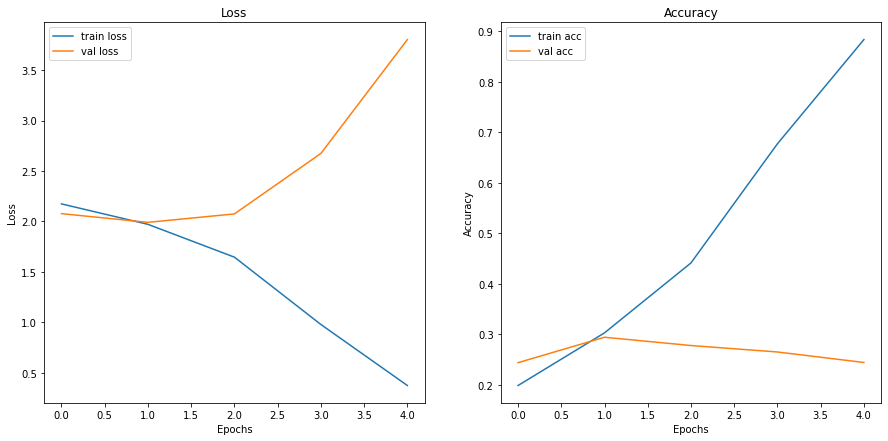

In [8]:
plot_history(history_1)

#### The model is overfitting, so we need to take measures to make the model more generalized.

1. Add more data
2. Simplify the model
3. Data Augmentation
4. Transfer learning

**Simplify the model**

In [9]:
# Set random seed
tf.random.set_seed(42)

# Build CNN model
model_2 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (244, 244, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

# Compile the model
model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = Adam(),
               metrics = ['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data, 
                        epochs= 5,
                        steps_per_epoch= len(train_data),
                        validation_data= test_data,
                        validation_steps= len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 182ms/step - loss: 2.2624 - accuracy: 0.1928 - val_loss: 1.9674 - val_accuracy: 0.2980
Epoch 2/5
235/235 [==============================] - 42s 180ms/step - loss: 1.8357 - accuracy: 0.3742 - val_loss: 1.8937 - val_accuracy: 0.3192
Epoch 3/5
235/235 [==============================] - 43s 181ms/step - loss: 1.5047 - accuracy: 0.5005 - val_loss: 1.9308 - val_accuracy: 0.3444
Epoch 4/5
235/235 [==============================] - 42s 181ms/step - loss: 1.0017 - accuracy: 0.6910 - val_loss: 2.1201 - val_accuracy: 0.3284
Epoch 5/5
235/235 [==============================] - 42s 181ms/step - loss: 0.5319 - accuracy: 0.8602 - val_loss: 2.4969 - val_accuracy: 0.3124


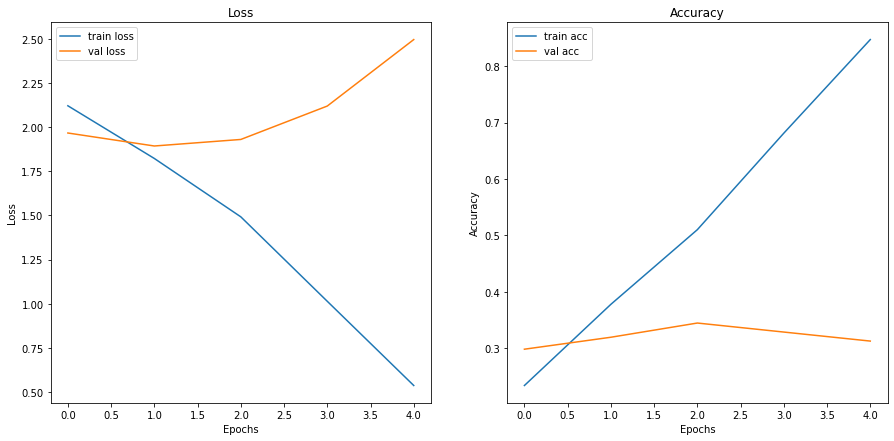

In [10]:
plot_history(history_2)

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 242, 242, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 121, 121, 10)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 119, 119, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 59, 59, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 34810)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                348110    
Total params: 349,300
Trainable params: 349,300
Non-trainable params: 0
________________________________________________

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 242, 242, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 240, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 120, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 118, 118, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 116, 116, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33640)             0

Looks like our attempt to simplify the model didn't work as it's clear from the model's summary that the trainable parameters didn't changed much so the model has not actually simplified. 

So let's try data augmentation now

In [11]:
augmented_train_datagen = ImageDataGenerator(rotation_range=0.2, 
                                             width_shift_range=0.2,
                                             height_shift_range=0.2, 
                                             shear_range=0.2, 
                                             zoom_range=0.2,
                                             horizontal_flip=True, 
                                             vertical_flip=True, 
                                             rescale=1.0/255)

augmented_train_data = augmented_train_datagen.flow_from_directory(directory = train_dir, 
                                                                   target_size=IMG_SIZE, 
                                                                   class_mode='categorical',
                                                                   batch_size=32,
                                                                   seed=42)


Found 7500 images belonging to 10 classes.


In [15]:
# Set random seed
tf.random.set_seed(42)

# Build the model (same configuration as model_1)
model_3 = Sequential([
                      Conv2D(10, 3, activation = 'relu', input_shape = (244, 244, 3)),
                      Conv2D(10, 3, activation = 'relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation = 'relu'),
                      Conv2D(10, 3, activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation = 'softmax')
])

model_3.compile(loss = CategoricalCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_3 = model_3.fit(augmented_train_data,
                        epochs = 5,
                        steps_per_epoch = len(augmented_train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 114s 485ms/step - loss: 2.2706 - accuracy: 0.1403 - val_loss: 2.0810 - val_accuracy: 0.2444
Epoch 2/5
235/235 [==============================] - 114s 487ms/step - loss: 2.1214 - accuracy: 0.2374 - val_loss: 1.9489 - val_accuracy: 0.3180
Epoch 3/5
235/235 [==============================] - 114s 487ms/step - loss: 2.0487 - accuracy: 0.2690 - val_loss: 1.8824 - val_accuracy: 0.3464
Epoch 4/5
235/235 [==============================] - 114s 486ms/step - loss: 1.9949 - accuracy: 0.2949 - val_loss: 1.8574 - val_accuracy: 0.3556
Epoch 5/5
235/235 [==============================] - 114s 485ms/step - loss: 1.9664 - accuracy: 0.3067 - val_loss: 1.9101 - val_accuracy: 0.3224


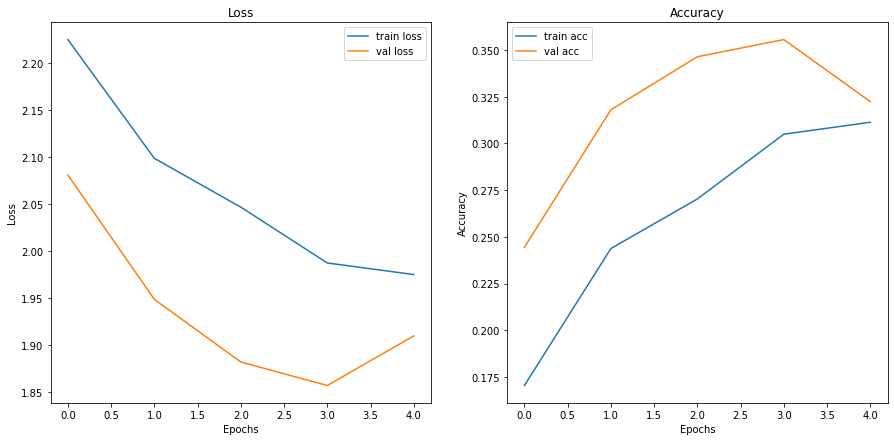

In [16]:
plot_history(history_3)

In [ ]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg

In [46]:
def prep_image_and_make_prediction(model, test_image_path, train_data_dir, train_datagenerator, img_shape = 244):
    """
    **This works for single image at time**
    
    Read an image from filename and turns into a tensor
    then reshapes it to (img_shape, img_shape, color_channel)
    """
    
    data_dir = pathlib.Path(train_data_dir)
    class_names = {v:k for k,v in train_datagenerator.class_indices.items()}
    
    # Read in the image
    img = tf.io.read_file(test_image_path)

    # Decode the read file into tensor
    img = tf.image.decode_image(img)

    # Resize the image
    img = tf.image.resize(img, size = [img_shape, img_shape])
    
    # rescale the image 
    img = img/255
    
    if img.ndim != 4:
        img = tf.expand_dims(img, axis = 0)  # add 1 extra dimension for number of batches
        
    pred = model.predict(img)
    # pred_class = class_names[int(tf.round(pred))]
    pred_class = class_names[np.argmax(pred)]
    
    plt.imshow(tf.squeeze(img))
    plt.title(f'Prediction: {pred_class} ({np.round(pred.max(), 2)})')
    plt.axis(False)
    plt.show()
    
    return 

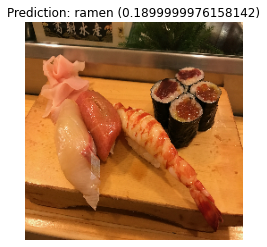

In [52]:
prep_image_and_make_prediction(model_3, test_image_path='/content/03-sushi.jpeg?raw=true', train_data_dir= train_dir, train_datagenerator= train_data)

In [54]:
# Save the model

model_3.save('multiclass_classification_model_final')

INFO:tensorflow:Assets written to: multiclass_classification_model_final/assets


In [55]:
# Load in trained model and verify it has been saved correctly
model_4 = tf.keras.models.load_model('multiclass_classification_model_final')

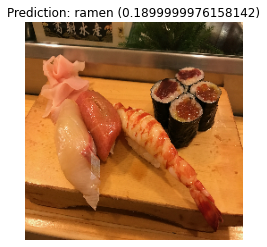

In [56]:
prep_image_and_make_prediction(model_4, test_image_path='/content/03-sushi.jpeg?raw=true', train_data_dir= train_dir, train_datagenerator= train_data)

In [58]:
model_3.evaluate(test_data)

79/79 [==============================] - 11s 132ms/step - loss: 1.9101 - accuracy: 0.3224


[1.910065770149231, 0.3224000036716461]

In [57]:
model_4.evaluate(test_data)

79/79 [==============================] - 11s 132ms/step - loss: 1.9101 - accuracy: 0.3224


[1.9100654125213623, 0.3224000036716461]

In [59]:
!zip -r /content/multiclass_classification_model_final.zip /content/multiclass_classification_model_final

  adding: content/multiclass_classification_model_final/ (stored 0%)
  adding: content/multiclass_classification_model_final/assets/ (stored 0%)
  adding: content/multiclass_classification_model_final/saved_model.pb (deflated 89%)
  adding: content/multiclass_classification_model_final/variables/ (stored 0%)
  adding: content/multiclass_classification_model_final/variables/variables.index (deflated 69%)
  adding: content/multiclass_classification_model_final/variables/variables.data-00000-of-00001 (deflated 7%)
